# 데이터 분할

- 머신러닝 모델의 성능을 정확하게 평가하기 위해서는 훈련에 사용하지 않은 테스트 세트를 통해 평가해야함
- 평가를 위한 별도의 데이터를 준비하거나 준비된 데이터 중에 일부를 떼어 테스트 세트로 준비
- 훈련 : 테스트 비율은 70 ~ 80 : 20 ~ 30
    - 반드시 정해져 있는 것은 아니며 연구자의 임의로 조절 가능함
    - 전체 데이터가 아주 크고 모든 데이터 패턴을 잘 담아내기만 한다면 테스트 데이터는 1%만 사용해도 충분할 수 있음

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler   #카테고리형 데이터 수치형으로 변환 labelencoder,스케일링standardscaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split          # Test데이터셋과 Tranin 데이터셋 분리

In [2]:
df = pd.read_csv("./data/Fish.csv")

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [10]:
df =df[df["Species"].isin(["Bream","Smelt"])][["Species","Weight","Length2"]]

In [19]:
df = df[df["Species"].isin(["Bream", "Smelt"])][["Species", "Weight", "Length2"]] 
#isin(여러개의 데이터 행 불러오는 함수)

In [11]:
le = LabelEncoder()
df["label"] = le.fit_transform(df["Species"])   #라벨로 Bream(도미)=0, Smelt (빙어)=1 

In [21]:
df.tail()

,Species,Weight,Length2,label
154,Smelt,12.2,12.2,1
155,Smelt,13.4,12.4,1
156,Smelt,12.2,13.0,1
157,Smelt,19.7,14.3,1
158,Smelt,19.9,15.0,1


In [8]:
df.shape

(49, 4)

## 샘플링 편향(sampling bias)

- 훈련 세트에 도미 데이터와 빙어 데이터가 골고루 들어가 있지 않다면 올바르게 분류할 수 없음
    - 예) 빙어 없이 훈련이 이루어진다면 어떤 데이터를 빙어로 분류해야할지 알 수 없음
- 데이터가 골고루 섞여있지 않으면 샘플링이 한쪽으로 치우쳤다는 의미로 샘플링 편향이라고 부름

## train_test_split()

- 전달되는 리스트나 배열을 섞은 후 비율에 맞게 훈련 세트와 테스트 세트로 나누어주는 함수

- random_state
    - 매번 코드를 실행할 때 마다 다른 결과가 나온다면 정확하게 모델을 평가할 수 없고 모델 최적화에 어려움이 있음
    - 난수를 생성할 때 특정한 규칙으로 생성해서 매번 같은 결과가 나오게 통제할 수 있음
    
- stratify
    - 무작위로 데이터를 섞으면 샘플링 편향이 일어날 수 있기 때문에 기존 데이터의 비율과 같은 비율로 데이터를 나눌 수 있도록 할 수 있음

In [24]:
len(y_test)

13

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df[["Length2", "Weight"]], df[["label"]],
                                                    test_size = 0.25,  #테스트 데이터 비율 설정
                                                     stratify = df[["label"]],random_state = 0) # stratify로 label비율 설정유지
                                                                                # random_state=0은 0번째부터 순서대로 섞는것

In [27]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

36 13 36 13


In [28]:
y_test

,label
3,0
7,0
18,0
21,0
145,1
0,0
33,0
4,0
146,1
152,1


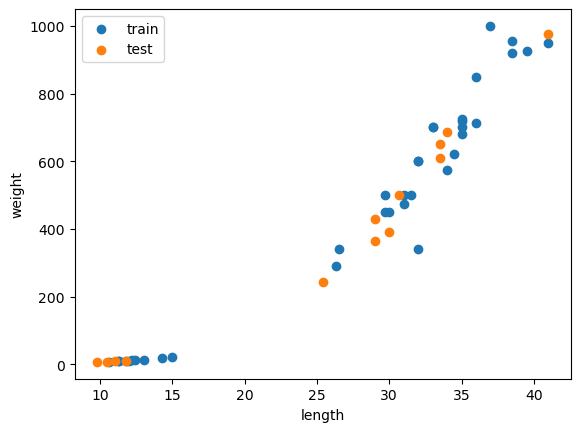

In [29]:
plt.figure()

plt.scatter(x_train["Length2"], x_train["Weight"], label = "train")
plt.scatter(x_test["Length2"], x_test["Weight"], label = "test")

plt.legend()
plt.xlabel("length")
plt.ylabel("weight")

plt.show()

# 모델 훈련

In [31]:
knn = KNeighborsClassifier()

In [32]:
knn.fit(x_train, y_train)

C:\ProgramData\anaconda5\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

# 모델 평가

In [56]:
knn.score(x_test, y_test)

1.0

# 모델 최적화

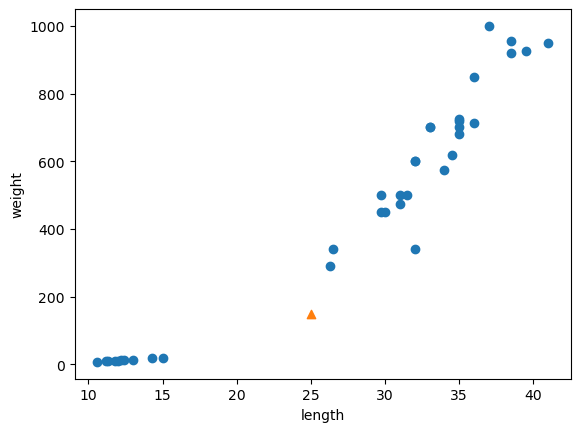

In [57]:
plt.figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1])
plt.scatter(25, 150, marker = "^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [43]:
knn.predict([[25, 150]])

C:\ProgramData\anaconda5\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

- kneighbors()
    - 이웃까지의 거리와 이웃 샘플의 인덱스를 반환

In [33]:
dist, idx = knn.kneighbors([[25, 150]])

C:\ProgramData\anaconda5\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [34]:
idx

array([[ 2, 32,  1, 34, 15]], dtype=int64)

In [35]:
dist

array([[130.48375378, 130.73859415, 137.17988191, 138.32150953,
        138.39320793]])

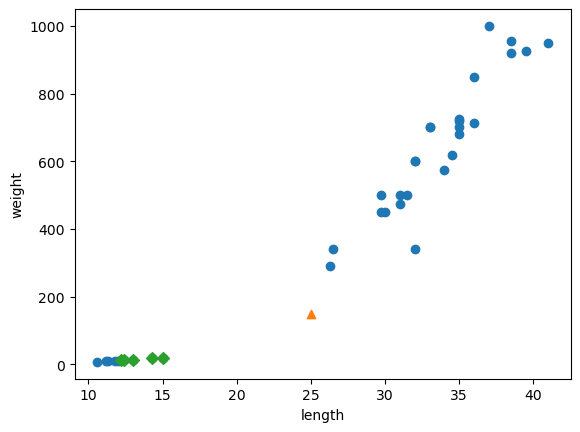

In [61]:
plt.figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1])
plt.scatter(25, 150, marker = "^")
plt.scatter(x_train.iloc[idx.flatten(), 0], x_train.iloc[idx.flatten(), 1], marker = "D")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [62]:
x_train.iloc[idx.flatten()]

,Length2,Weight
158,15.0,19.9
157,14.3,19.7
155,12.4,13.4
156,13.0,12.2
154,12.2,12.2


In [63]:
y_train.iloc[idx.flatten()]

,label
158,1
157,1
155,1
156,1
154,1


In [64]:
print(dist)

[[130.48375378 130.73859415 137.17988191 138.32150953 138.39320793]]


- x축은 범위가 좁고, y축은 범위가 넓기 때문에 y축으로 조금만 차이가 벌어져도 큰 값으로 거리가 계산됨

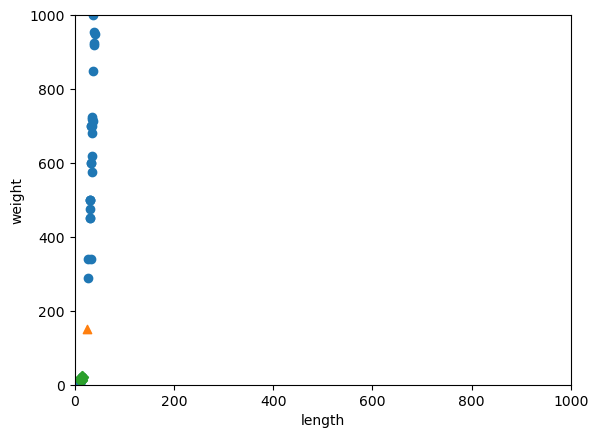

In [65]:
# x, y축을 동일 범위로 시각화
plt.figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1])
plt.scatter(25, 150, marker = "^")
plt.scatter(x_train.iloc[idx.flatten(), 0], x_train.iloc[idx.flatten(), 1], marker = "D")

plt.xlabel("length")
plt.ylabel("weight")

plt.axis([0, 1000, 0, 1000])

plt.show()

- 시각화 자료를 참고하면 현재 데이터에서 생선의 길이는 모델이 값을 예측하는데에 거의 사용되지 않고 있음
    - 두 독립변수의 단위가 다르기 때문에
    
- knn은 특히 데이터 간 거리가 모델 성능에 영향을 많이 주는 특성이 있음
    - 각 독립변수의 단위가 다르면 올바른 예측이 어려울 가능성이 높음
    
- 각 독립변수의 단위를 일정한 기준으로 맞춰 주는 작업을 스케일링(scaling)이라고 함

## 스케일링

- 스탠다드 스케일링(standard scaling)
    - 각 피처값이 0에서 표준편차의 몇 배만큼 떨어져있는지를 나타내 데이터의 단위와 관계없이 동일한 조건으로 비교할 수 있게 변환
        - 분산 : 데이터의 평균을 뺀 값을 모두 제곱한 다음 평균을 계산
        - 표준편차 : 분산의 제곱근. 데이터가 분산된 정도.
        
    - 계산식
        - (특성값 - 평균) / 표준편차

In [36]:
ss = StandardScaler()

In [37]:
scaled_x_train = ss.fit_transform(x_train)

In [38]:
scaled_x_train[:5]

array([[ 0.20190193,  0.09242248],
       [-1.52773383, -1.38169216],
       [-1.26778858, -1.36200095],
       [ 0.73179034,  0.63771767],
       [ 1.08171665,  1.36477791]])

In [42]:
scaled_x_train[:,1]

array([ 0.09242248, -1.38169216, -1.36200095,  0.63771767,  1.36477791,
        1.379925  ,  0.39536425,  0.09242248, -1.39199218, -0.39228434,
       -1.40108043,  0.75889437,  0.69830602,  1.45566044,  0.69830602,
       -1.38532746,  1.15271867, -0.54375523, -0.39228434, -1.39259806,
        0.31962881,  0.77404146,  0.74071787, -1.39259806, -0.0590484 ,
       -0.0590484 ,  1.47080753,  0.09242248,  0.01668704,  0.39536425,
        0.69830602,  0.45595261, -1.36260683,  1.60713133, -1.38532746,
       -1.39593042])

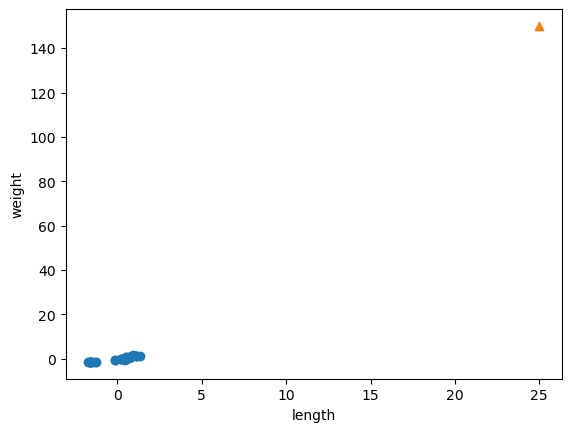

In [71]:
# 스케일링된 데이터 시각화
plt.figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
plt.scatter(25, 150, marker = "^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

- 값의 스케일이 달라졌기 때문에 테스트 데이터도 스케일링 해줘야 함

In [72]:
scaled_data = ss.transform([[25, 150]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [73]:
scaled_data

array([[-0.26799912, -0.9678737 ]])

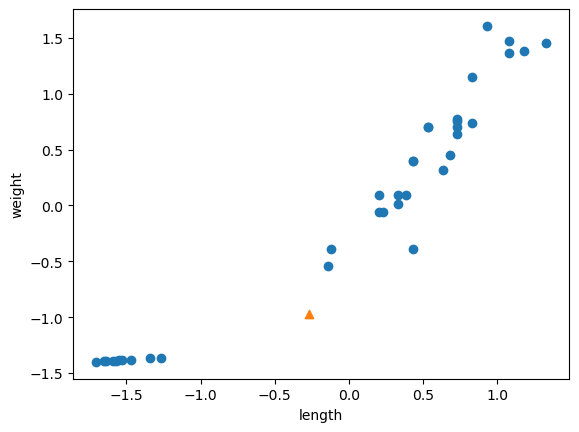

In [74]:
plt.figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
plt.scatter(scaled_data[0, 0], scaled_data[0, 1], marker = "^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [75]:
# 스케일링된 데이터로 다시 모델 훈련
knn = KNeighborsClassifier()

In [76]:
knn.fit(scaled_x_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [77]:
# 문제의 데이터 예측
knn.predict(scaled_data)

array([0])

In [78]:
# 다시 훈련한 모델 성능 확인
scaled_x_test = ss.transform(x_test)

In [79]:
knn.score(scaled_x_test, y_test)

1.0

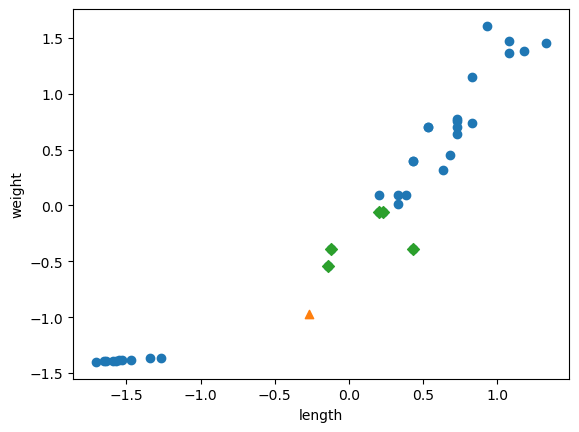

In [80]:
# 시각화
dis, idx = knn.kneighbors(scaled_data)

plt.figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
plt.scatter(scaled_data[0, 0], scaled_data[0, 1], marker = "^")
plt.scatter(scaled_x_train[idx.flatten(), 0], scaled_x_train[idx.flatten(), 1], marker = "D")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()